#### Implement a KNN model to classify the animals in to categorie
#dataset-->Zoo.csv
#input-->
animalname,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type

In [8]:
import pandas as pd
import matplotlib.pyplot as plt 

In [9]:
animal = pd.read_csv("C:\\Users\\Raja\\Downloads\\assignments\\knn\\Zoo.csv")

In [10]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [11]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(animal.iloc[:,1:])
df_norm.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,0.355198,0.742574,0.128713,0.435644,0.305281
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,0.254173,0.439397,0.336552,0.498314,0.350452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.166667
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.500000,1.000000,0.000000,1.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
animal.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [13]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 

In [14]:
#p = np.array(df_norm) # converting into numpy array format 
#help(linkage)
z = linkage(df_norm, method="complete",metric="euclidean")

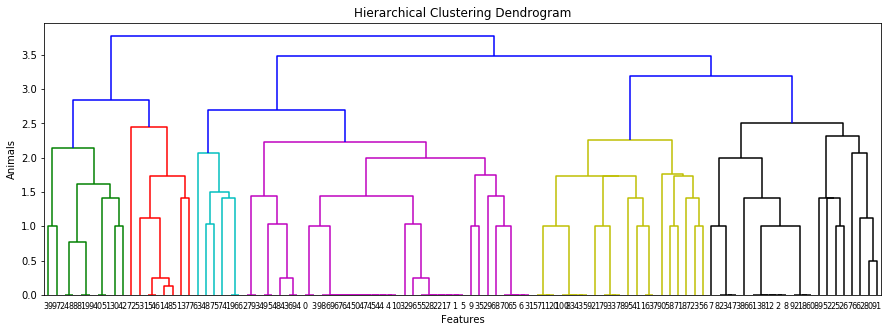

In [18]:
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Animals')
sch.dendrogram(z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [17]:
animal.shape

(101, 18)

In [19]:
animal.type.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

C:\Users\Raja\Anaconda33\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Raja\Anaconda33\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


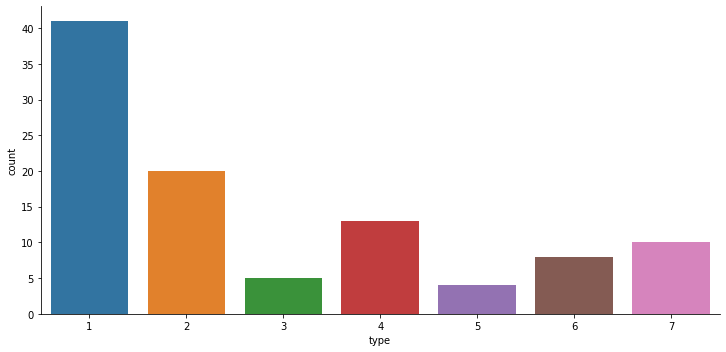

In [21]:
import seaborn as sns
sns.factorplot('type', data=animal, kind="count",size = 5,aspect = 2)


In [25]:
from sklearn.cluster import	KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [26]:
model=KMeans(n_clusters=7)
model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
model.labels_

array([1, 5, 3, 1, 1, 5, 5, 3, 3, 5, 1, 2, 3, 0, 0, 0, 2, 5, 3, 1, 2, 2,
       5, 2, 6, 4, 4, 5, 5, 1, 6, 5, 5, 2, 3, 5, 5, 2, 3, 6, 6, 2, 6, 2,
       1, 1, 0, 1, 1, 1, 1, 6, 4, 0, 1, 5, 2, 2, 2, 2, 3, 3, 4, 1, 1, 5,
       1, 1, 1, 1, 5, 2, 0, 3, 1, 1, 4, 0, 2, 2, 4, 6, 3, 2, 5, 0, 3, 2,
       6, 4, 2, 4, 3, 5, 5, 2, 5, 6, 1, 6, 2])

========================================================================================================================

#### Prepare a model for glass classification using KNN Data 
#dataset-->glass.csv
#input-->RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type

In [28]:
glass = pd.read_csv("C:\\Users\\Raja\\Downloads\\assignments\\knn\\glass.csv")

In [29]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [30]:
# Normalized data frame (considering the numerical part of data)
df_norm1 = norm_func(glass.iloc[:,1:])
df_norm1.describe()

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.402684,0.597891,0.359784,0.507310,0.080041,0.327785,0.055570,0.111783,0.296729
std,0.122798,0.321249,0.155536,0.138312,0.105023,0.132263,0.157847,0.191056,0.350623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.327444,0.471047,0.280374,0.441071,0.019726,0.261152,0.000000,0.000000,0.000000
50%,0.386466,0.775056,0.333333,0.532143,0.089372,0.294610,0.000000,0.000000,0.166667
75%,0.465414,0.801782,0.417445,0.585268,0.098229,0.347816,0.000000,0.196078,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
glass.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [33]:
z1 = linkage(df_norm1, method="complete",metric="euclidean")

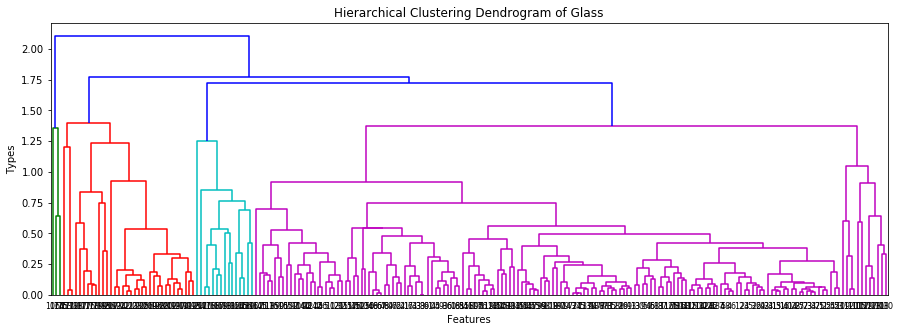

In [34]:
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram of Glass')
plt.xlabel('Features')
plt.ylabel('Types')
sch.dendrogram(z1,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [35]:
glass.shape

(214, 10)

In [36]:
glass.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

C:\Users\Raja\Anaconda33\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Raja\Anaconda33\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


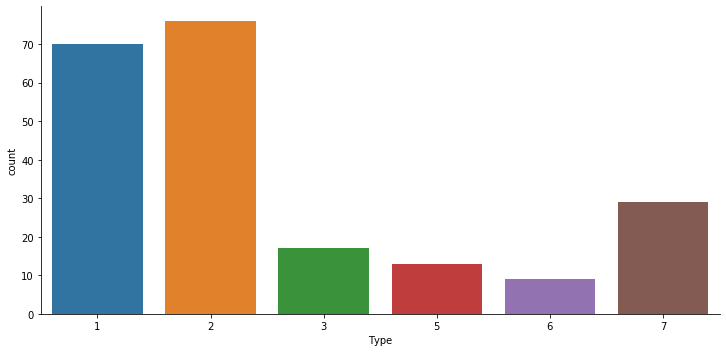

In [39]:
sns.factorplot('Type', data=glass, kind="count",size = 5,aspect = 2)

#### Can be seen that type of glass (4) is absent. Rest graph shows clearly.

In [40]:
model1=KMeans(n_clusters=6)
model1.fit(df_norm1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
model.labels_

array([1, 5, 3, 1, 1, 5, 5, 3, 3, 5, 1, 2, 3, 0, 0, 0, 2, 5, 3, 1, 2, 2,
       5, 2, 6, 4, 4, 5, 5, 1, 6, 5, 5, 2, 3, 5, 5, 2, 3, 6, 6, 2, 6, 2,
       1, 1, 0, 1, 1, 1, 1, 6, 4, 0, 1, 5, 2, 2, 2, 2, 3, 3, 4, 1, 1, 5,
       1, 1, 1, 1, 5, 2, 0, 3, 1, 1, 4, 0, 2, 2, 4, 6, 3, 2, 5, 0, 3, 2,
       6, 4, 2, 4, 3, 5, 5, 2, 5, 6, 1, 6, 2])